In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/ALDA/ECONet/train.csv")
Y = df.target


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


False    6358102
True      235172
Name: target, dtype: int64

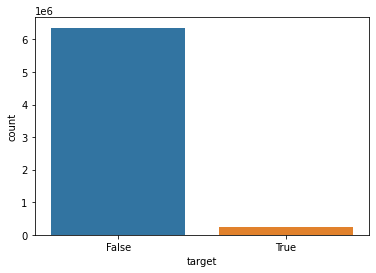

In [3]:
import seaborn as sns

sns.countplot(df['target'])
Y.value_counts()

In [4]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df.loc[(df['target']==False)]
df_minority = df.loc[(df['target']==True)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=6358102, random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

sns.countplot(df_upsampled['target'])
print(df_upsampled['target'].value_counts())

True     6358102
False    6358102
Name: target, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['Station','Ob','measure','target'], axis=1), df_upsampled.target, train_size=0.1, random_state=123)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy for training data')
print(accuracy_score(y_train, pred_train))
print('Accuracy for test data')
print(accuracy_score(y_test, pred_test))
print()
print('Confusion matrix for test data')
print(confusion_matrix(y_test, pred_test))
print()
print('Classification report for test data')
print(classification_report(y_test, pred_test))


Accuracy for training data
0.9602223934823296
Accuracy for test data
0.9560127305632079

Confusion matrix for test data
[[5370762  352033]
 [ 151383 5570406]]

Classification report for test data
              precision    recall  f1-score   support

       False       0.97      0.94      0.96   5722795
        True       0.94      0.97      0.96   5721789

    accuracy                           0.96  11444584
   macro avg       0.96      0.96      0.96  11444584
weighted avg       0.96      0.96      0.96  11444584



Logistic: f1=0.957 auc=0.988


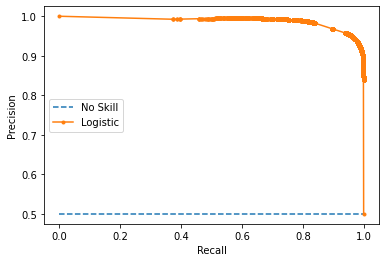

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, pred_test), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [16]:
# downsample minority class
df_majority_downsampled = resample(df_majority, replace=True, n_samples=235172, random_state=42)

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

sns.countplot(df_downsampled['target'])
print(df_downsampled['target'].value_counts())

False    235172
True     235172
Name: target, dtype: int64


In [17]:
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(df_downsampled.drop(['Station','Ob','measure','target'], axis=1), df_downsampled.target, train_size=0.1, random_state=123)
classifier.fit(X_train_down, y_train_down)

pred_down_train = classifier.predict(X_train_down)
pred_down_test = classifier.predict(X_test_down)

In [18]:
# metrics for undersampling

print('Accuracy for training data')
print(accuracy_score(y_train_down, pred_down_train))
print('Accuracy for test data')
print(accuracy_score(y_test_down, pred_down_test))
print()
print('Confusion matrix for test data')
print(confusion_matrix(y_test_down, pred_down_test))
print()
print('Classification report for test data')
print(classification_report(y_test_down, pred_down_test))

Accuracy for training data
0.9685334013692223
Accuracy for test data
0.9393753986440198

Confusion matrix for test data
[[196574  15113]
 [ 10550 201073]]

Classification report for test data
              precision    recall  f1-score   support

       False       0.95      0.93      0.94    211687
        True       0.93      0.95      0.94    211623

    accuracy                           0.94    423310
   macro avg       0.94      0.94      0.94    423310
weighted avg       0.94      0.94      0.94    423310



Logistics for UnderSampling: f1=0.940 auc=0.982


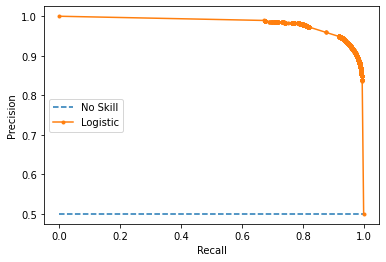

In [20]:
# predict probabilities
lr_probs = classifier.predict_proba(X_test_down)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test_down, lr_probs)
lr_f1, lr_auc = f1_score(y_test_down, pred_down_test), auc(lr_recall, lr_precision)
# summarize scores
print('Logistics for UnderSampling: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test_down[y_test_down==1]) / len(y_test_down)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()